# <center>Walmart dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('./walmart-sales-dataset-of-45stores.csv', parse_dates=['Date'])
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


#### checking null sum

In [5]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
data.shape

(6435, 8)

#### checking for duplicate values

In [7]:
data.duplicated().sum()

0

In [8]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

### Sorting the dataframe based on date

In [9]:
data.sort_values(by='Date', inplace= True)
data.reset_index(drop= True, inplace= True)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768
1,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067
2,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003
3,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265
4,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476


### Lets add new columns from the date column

In [10]:
data['year'] = data.Date.dt.year
data['month'] = data.Date.dt.month
data['week_day'] = data.Date.dt.weekday
data.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,week_day
0,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,2010,1,6
1,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,2010,1,6


In [11]:
data['month']= data.month.replace({1:'January',
                                   2:'February',
                                   3:'March',
                                   4:'April',
                                   5:'May',
                                   6:'June',
                                   7:'July',
                                   8:'August',
                                   9:'September',
                                   10:'October',
                                   11:'November',
                                   12:'December'})
data['week_day']= data.week_day.replace({0:'Sunday',
                                        1:'Monday',
                                        2:'Tuesday',
                                        3:'Wednesday',
                                        4:'Thursday',
                                        5:'Friday',
                                        6:'Saturday'})
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,week_day
0,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,2010,January,Saturday
1,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,2010,January,Saturday
2,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,2010,January,Saturday
3,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,2010,January,Saturday
4,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,2010,January,Saturday


# Univariate Analysis

### histogram

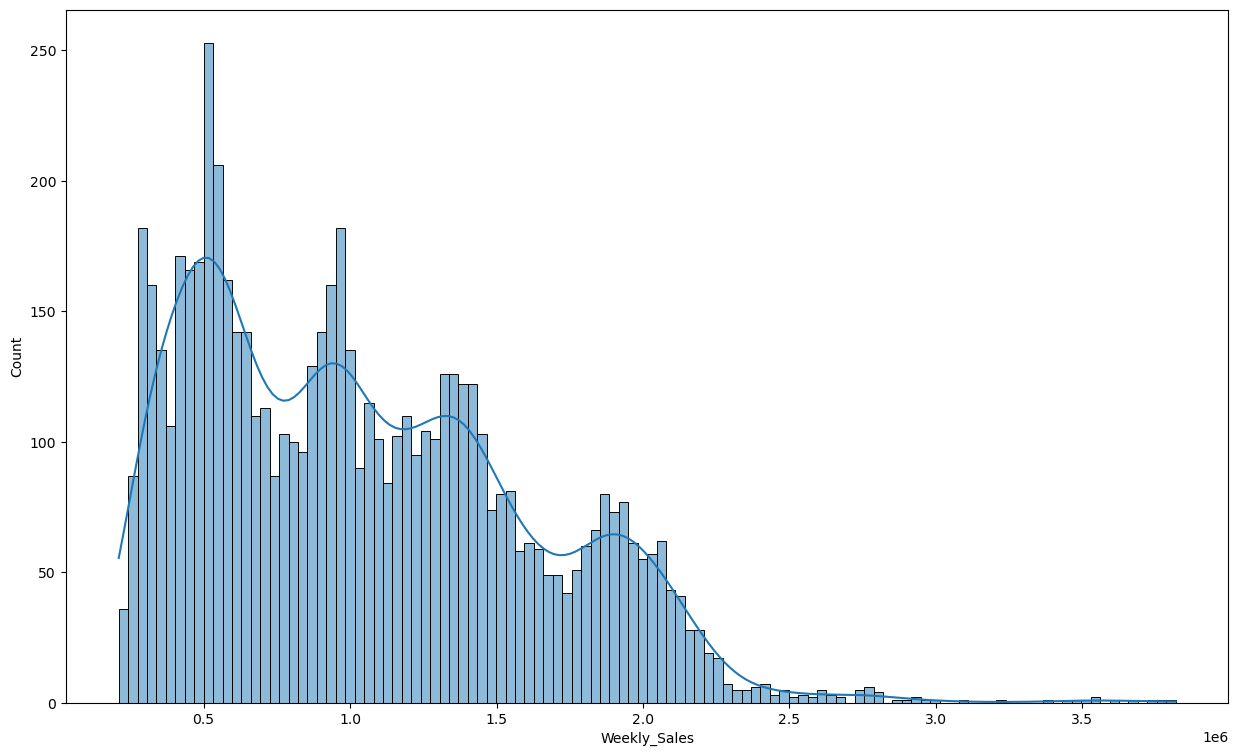

In [12]:
plt.figure(figsize=(15,9))
sns.histplot(data=data,kde= True, x= 'Weekly_Sales', bins=112)
plt.show();

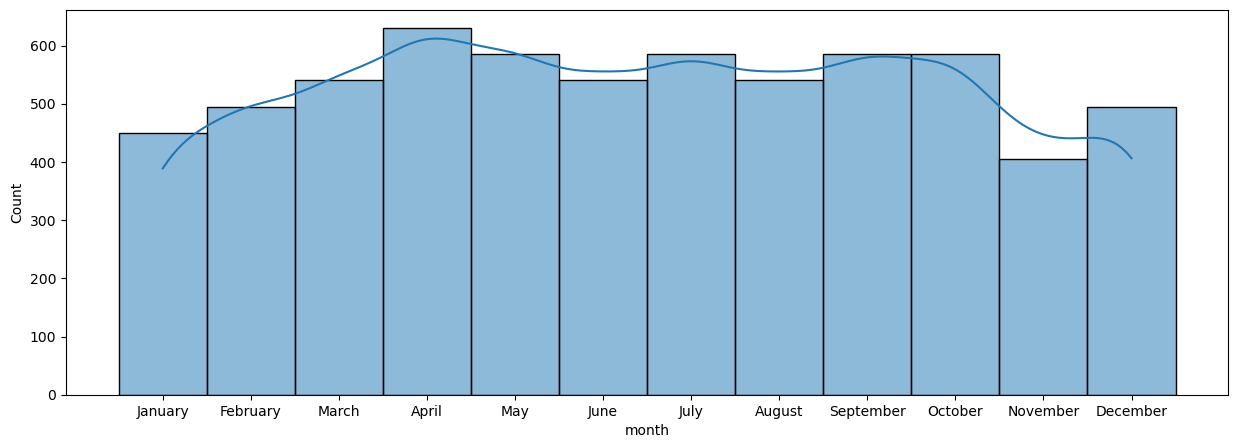

In [13]:
plt.figure(figsize=(15,5))
sns.histplot(data=data,x='month', kde=True )
plt.show();

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   year          6435 non-null   int64         
 9   month         6435 non-null   object        
 10  week_day      6435 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 553.1+ KB


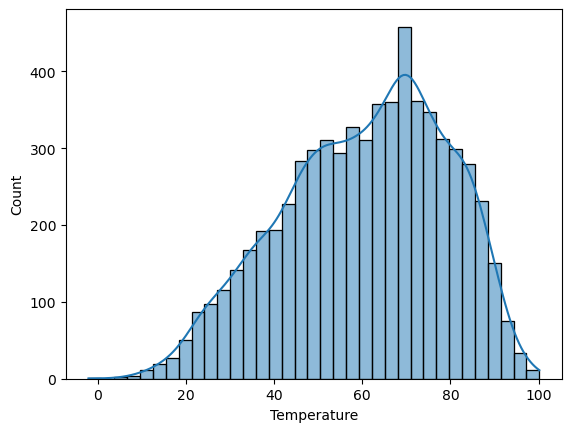

In [15]:
sns.histplot(data=data,kde=True, x='Temperature')
plt.show();

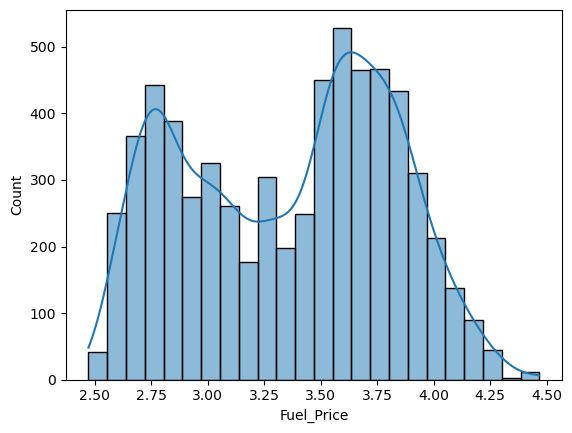

In [16]:
sns.histplot(data=data, kde=True, x='Fuel_Price')
plt.show();

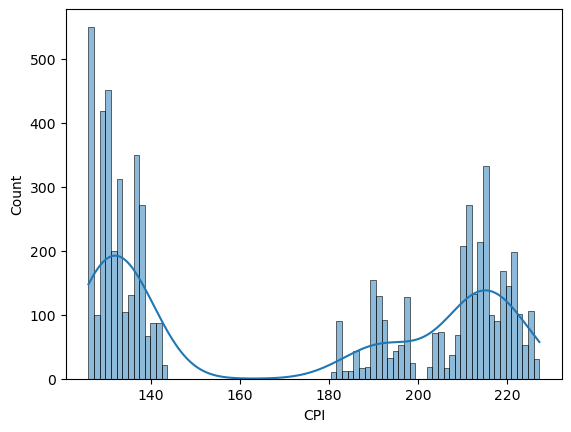

In [17]:
sns.histplot(data=data, kde= True, x='CPI', bins=80)
plt.show();

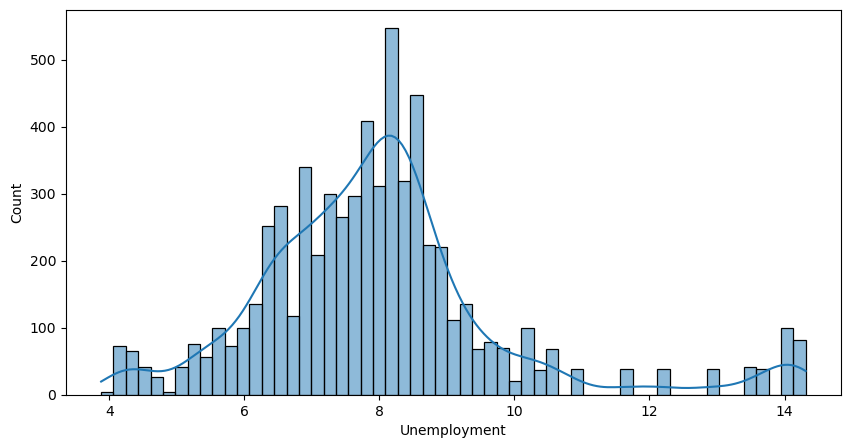

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, kde= True, x= 'Unemployment')
plt.show()

## Box plots

In [19]:
column_list = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']


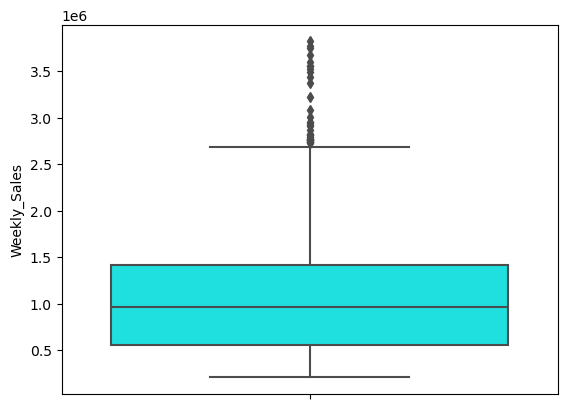

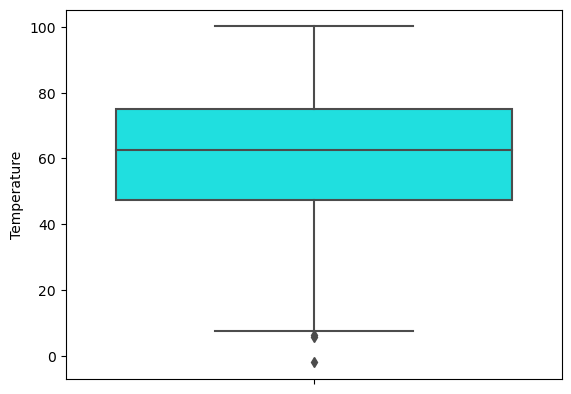

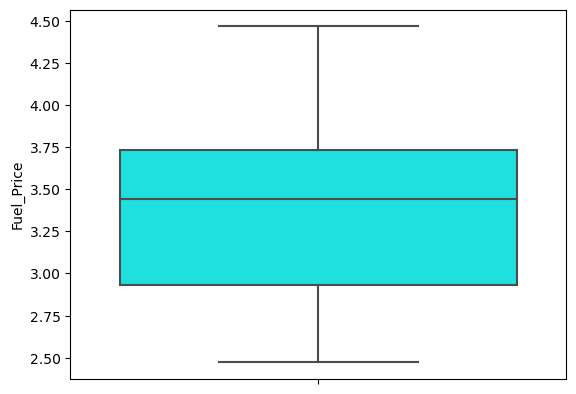

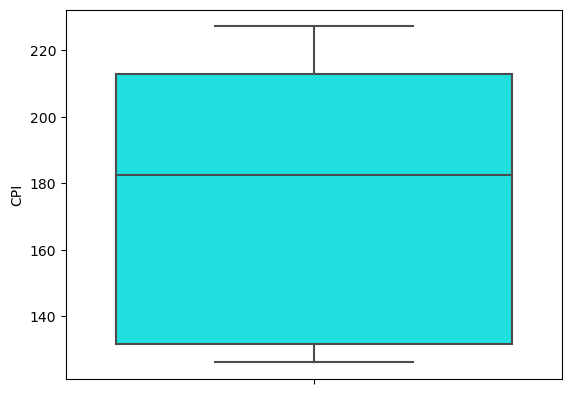

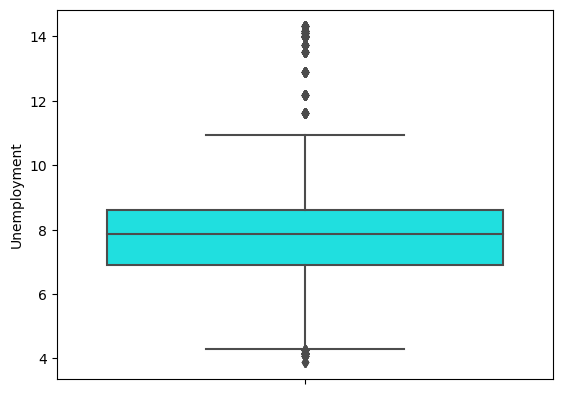

In [20]:
for i in column_list:
    sns.boxplot(y=data[i], data=data, color='cyan')
    plt.show()

## Count plot

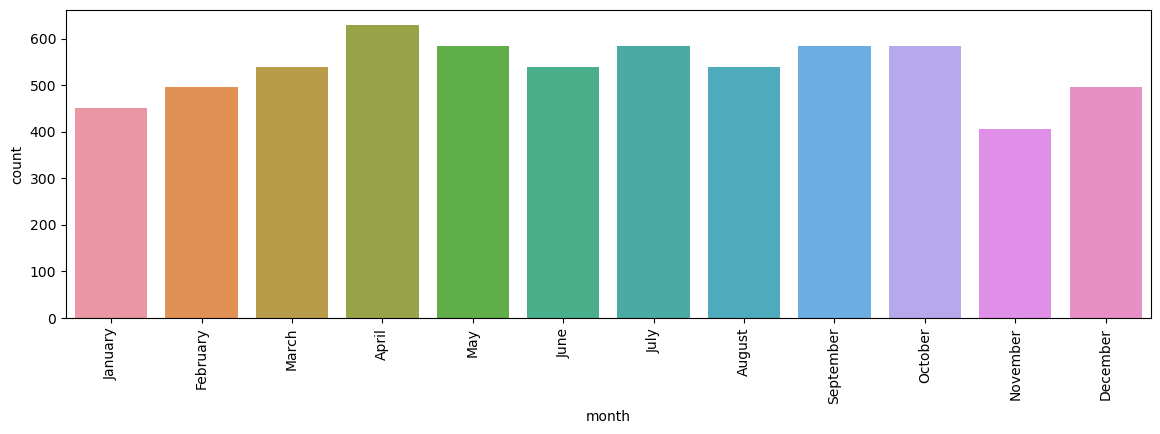

In [21]:
plt.figure(figsize=(14,4))
sns.countplot(x='month',data=data)
plt.xticks(rotation= 90)
plt.show();


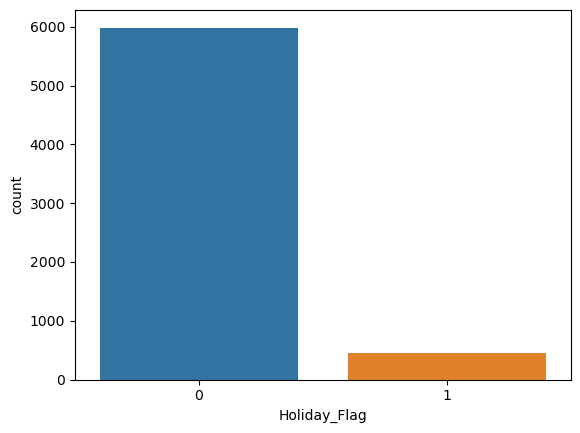

In [22]:
sns.countplot(x='Holiday_Flag', data=data)
plt.show()

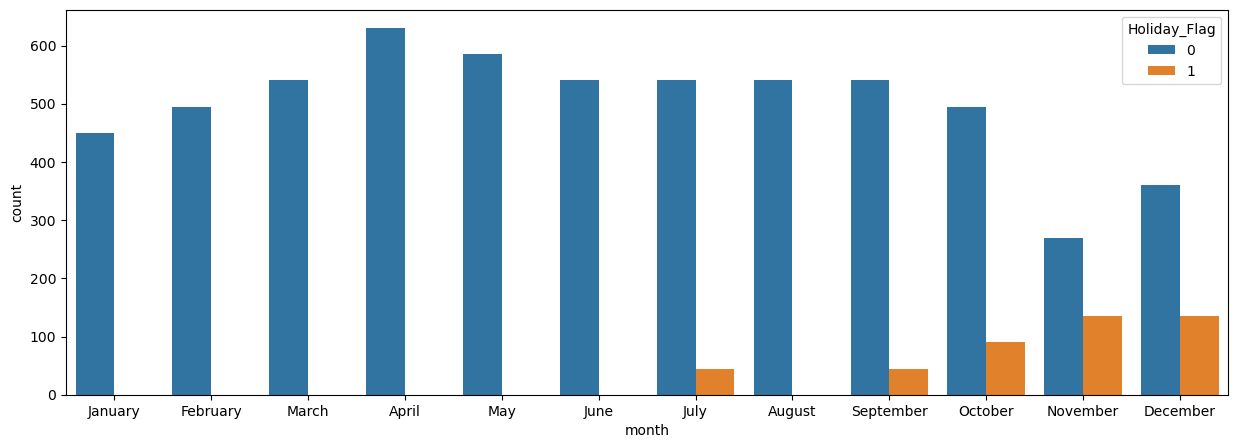

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='month',hue='Holiday_Flag')
plt.show();

## Line Charts

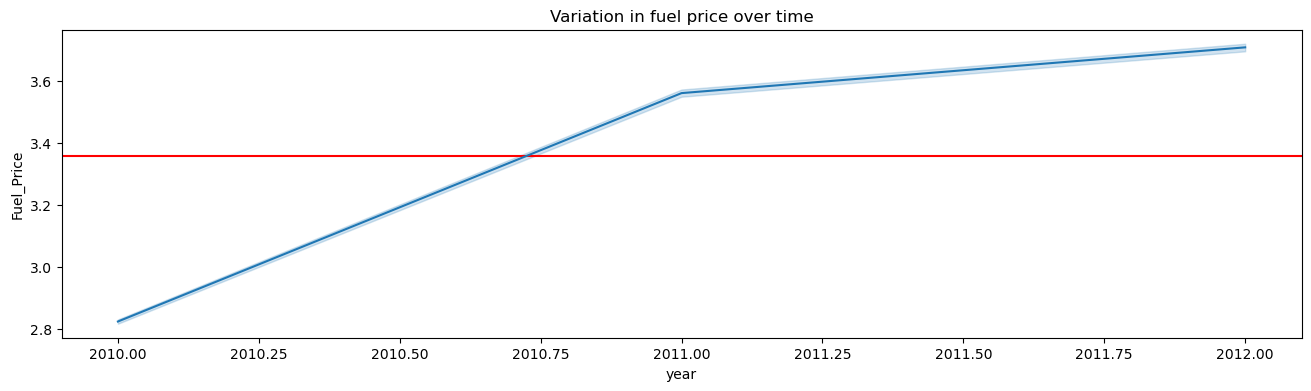

In [24]:
plt.figure(figsize=(16,4))
plt.axhline(y=data.Fuel_Price.mean(), color='r')
sns.lineplot(x='year', y='Fuel_Price', data=data)
plt.title("Variation in fuel price over time")
plt.show()

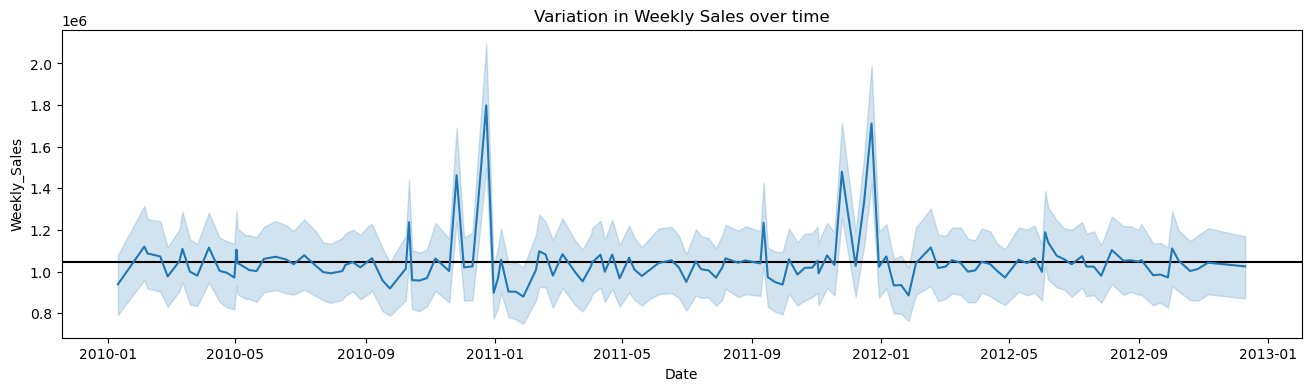

In [25]:
plt.figure(figsize=(16,4))
plt.axhline(y=data.Weekly_Sales.mean(), color='black')
sns.lineplot(x='Date', y='Weekly_Sales', data=data)
plt.title("Variation in Weekly Sales over time")
plt.show()

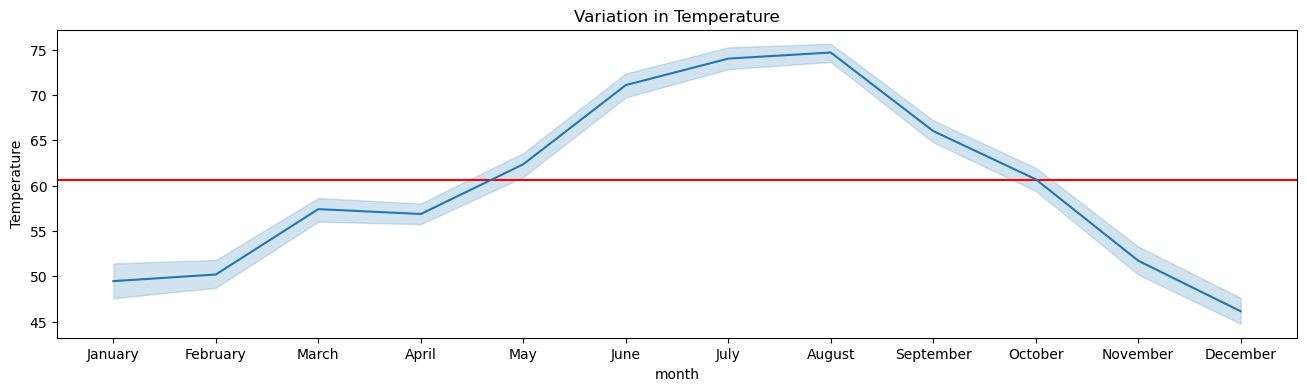

In [26]:
plt.figure(figsize=(16,4))
plt.axhline(y=data.Temperature.mean(), color='r')
sns.lineplot(x='month',y='Temperature',data=data)
plt.title("Variation in Temperature")
plt.show()

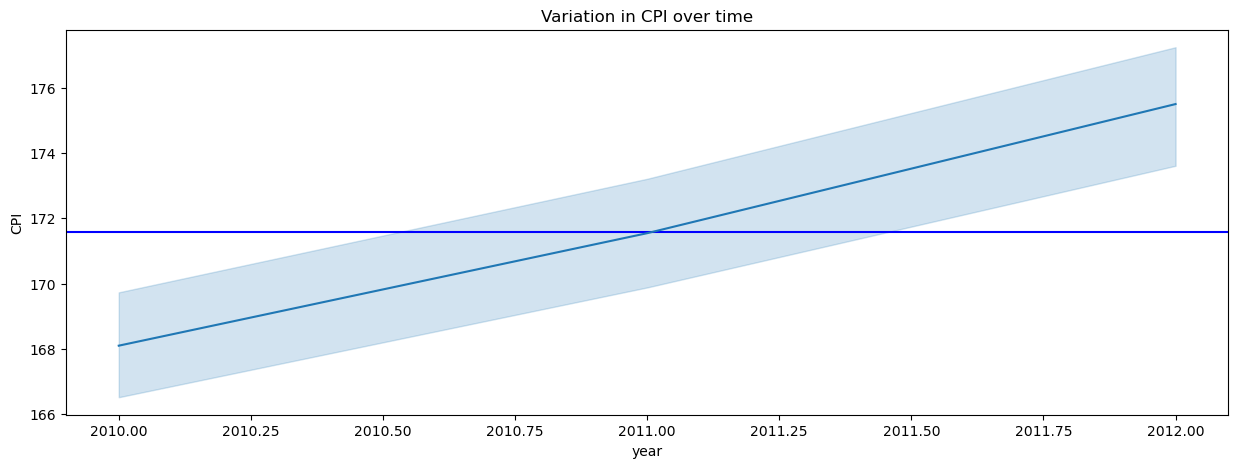

In [27]:
plt.figure(figsize=(15,5))
plt.axhline(y=data.CPI.mean(),color='blue')
sns.lineplot(x='year',y='CPI',data=data)
plt.title("Variation in CPI over time")
plt.show();

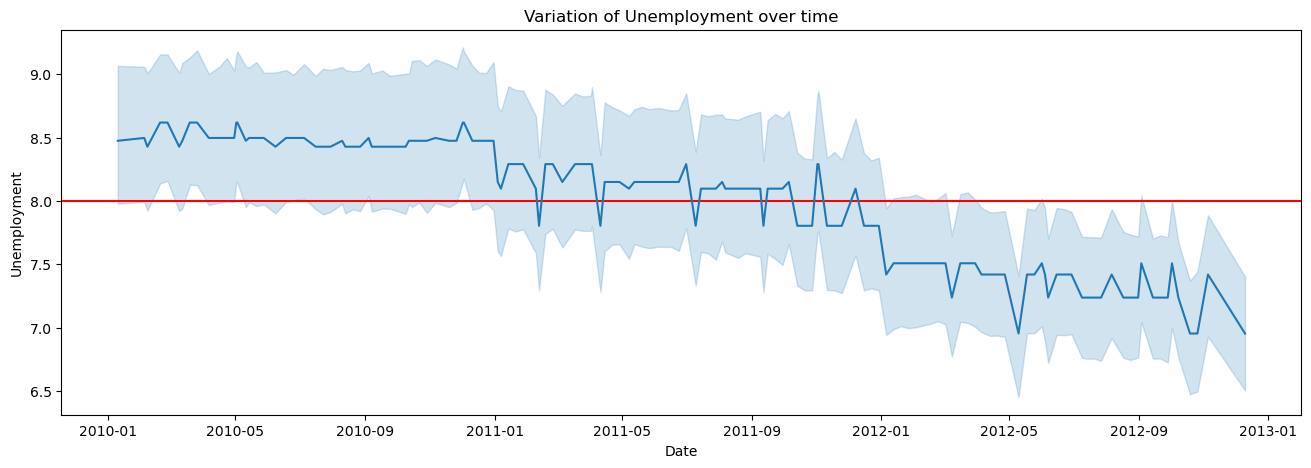

In [28]:
plt.figure(figsize=(16,5))
plt.axhline(y=data.Unemployment.mean(), color='r')
sns.lineplot(x='Date',y='Unemployment',data=data )
plt.title("Variation of Unemployment over time")
plt.show();

## Scatter plot

In [29]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'week_day'],
      dtype='object')

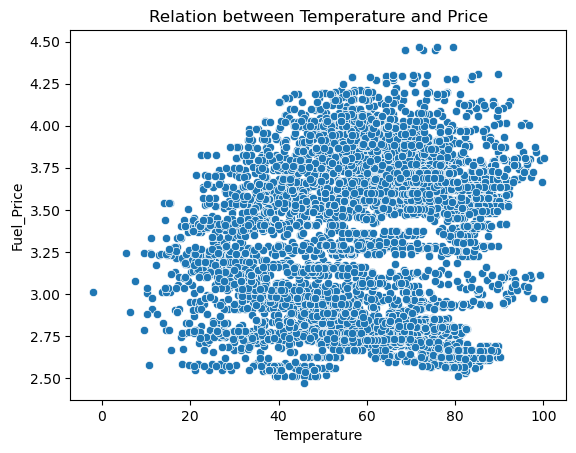

In [30]:
sns.scatterplot(x='Temperature',y='Fuel_Price',data=data)
plt.title("Relation between Temperature and Price")
plt.show();

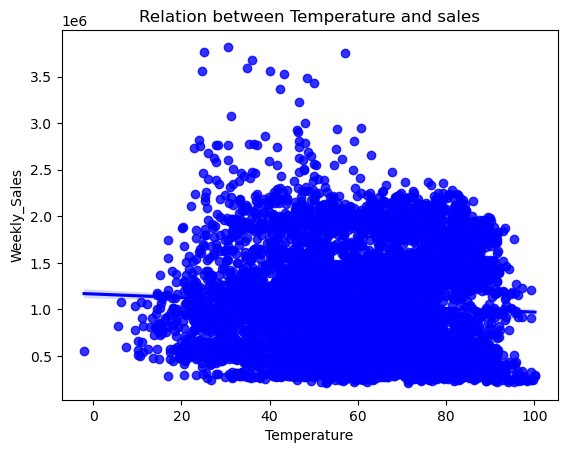

In [31]:
sns.regplot(x='Temperature',y='Weekly_Sales',data=data, color='b')
plt.title("Relation between Temperature and sales")
plt.show();

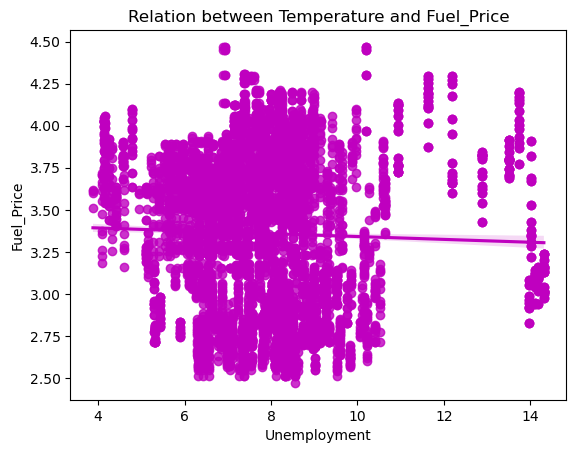

In [32]:
sns.regplot(x='Unemployment',y='Fuel_Price',data=data, color='m')
plt.title("Relation between Temperature and Fuel_Price")
plt.show();

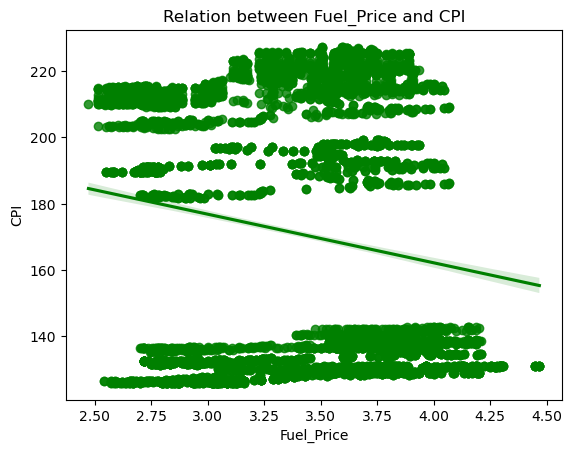

In [33]:
sns.regplot(x='Fuel_Price',y='CPI',data=data,color='g')
plt.title("Relation between Fuel_Price and CPI")
plt.show();

## Pie chart

In [34]:
week_sales= data.groupby(['week_day'])['Weekly_Sales'].mean()

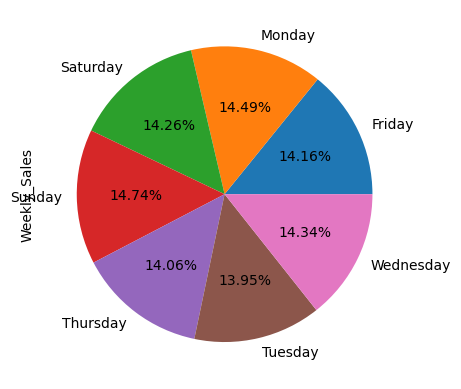

In [35]:
week_sales.plot.pie(autopct = '%1.2f%%')
plt.show();

In [36]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'week_day'],
      dtype='object')

In [37]:
cpi_year= data.groupby(['year'])['CPI'].mean()
cpi_year

year
2010    168.101782
2011    171.545716
2012    175.498781
Name: CPI, dtype: float64

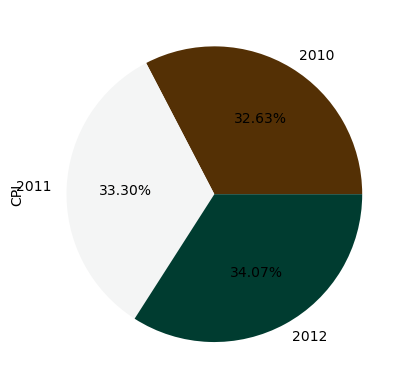

In [38]:
cpi_year.plot.pie(autopct='%1.2f%%',cmap='BrBG')
plt.show()

In [39]:
year_unemp=data.groupby(['year'])['Unemployment'].sum()
year_unemp

year
2010    18344.263
2011    18911.964
2012    14218.310
Name: Unemployment, dtype: float64

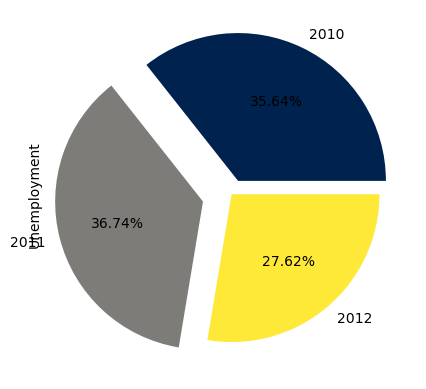

In [40]:
year_unemp.plot.pie(autopct='%1.2f%%', cmap='cividis',explode=[0.1,0.2,0]);

## Bar plot

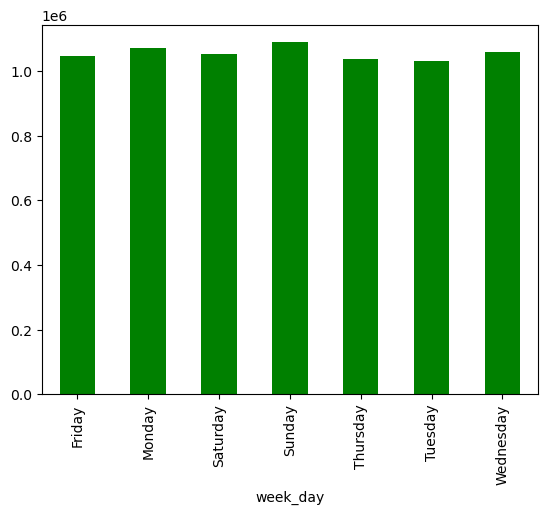

In [41]:
week_sales.plot.bar(color='g');

In [42]:
month_temp= data.groupby(['month'])['Temperature'].mean()
month_temp

month
April        56.874238
August       74.677296
December     46.154687
February     50.208061
January      49.474156
July         74.005812
June         71.083870
March        57.414333
May          62.361692
November     51.733111
October      60.707145
September    66.021179
Name: Temperature, dtype: float64

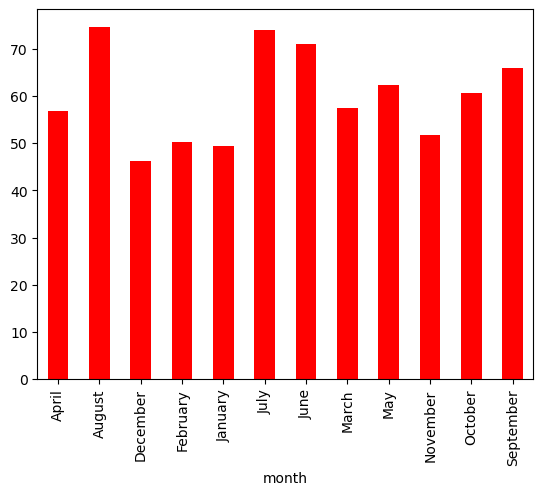

In [43]:
month_temp.plot.bar(color='r');

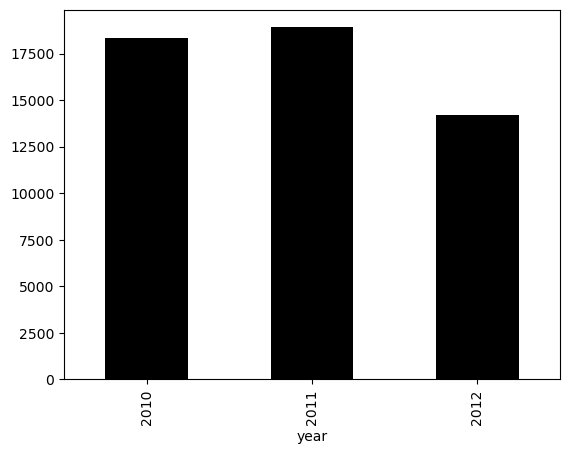

In [44]:
year_unemp.plot.bar(color='k');

In [45]:
year_sales=data.groupby(['year'])['Weekly_Sales'].sum()
year_sales

year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

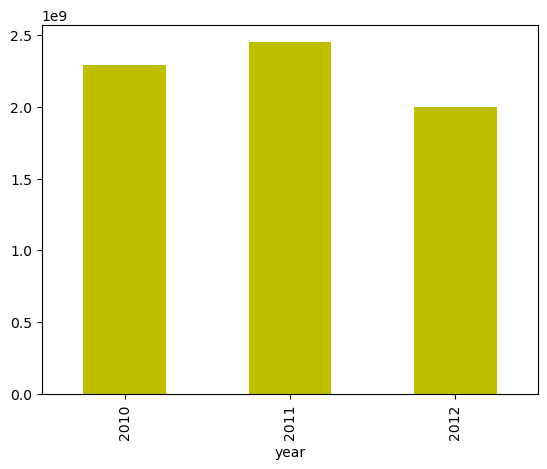

In [46]:
year_sales.plot.bar(color='y');

In [47]:
year_holiday=data.groupby(['year'])['Holiday_Flag'].sum()
year_holiday

year
2010    180
2011    180
2012     90
Name: Holiday_Flag, dtype: int64

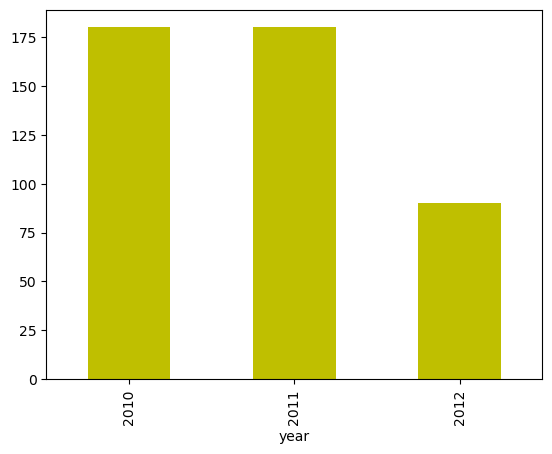

In [48]:
year_holiday.plot.bar(color='y');

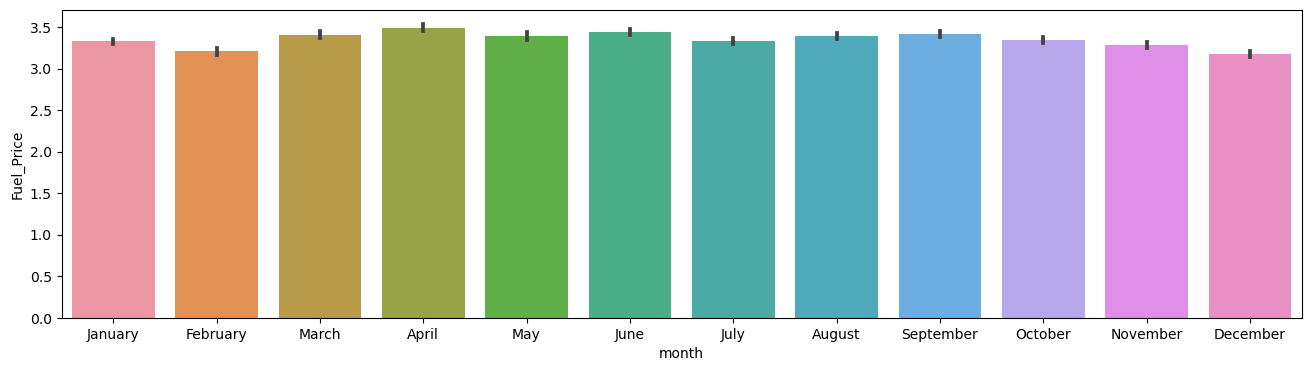

In [49]:
plt.figure(figsize=(16,4))
sns.barplot(x='month',y='Fuel_Price', data=data);

### YEAR VISE PLOTS

In [50]:
year_2010 = data[data.year == 2010]
year_2011 = data[data.year == 2011]
year_2012 = data[data.year == 2012]

In [51]:
year_2010.drop(columns='year', inplace=True)
year_2011.drop(columns='year', inplace=True)
year_2012.drop(columns='year', inplace=True)

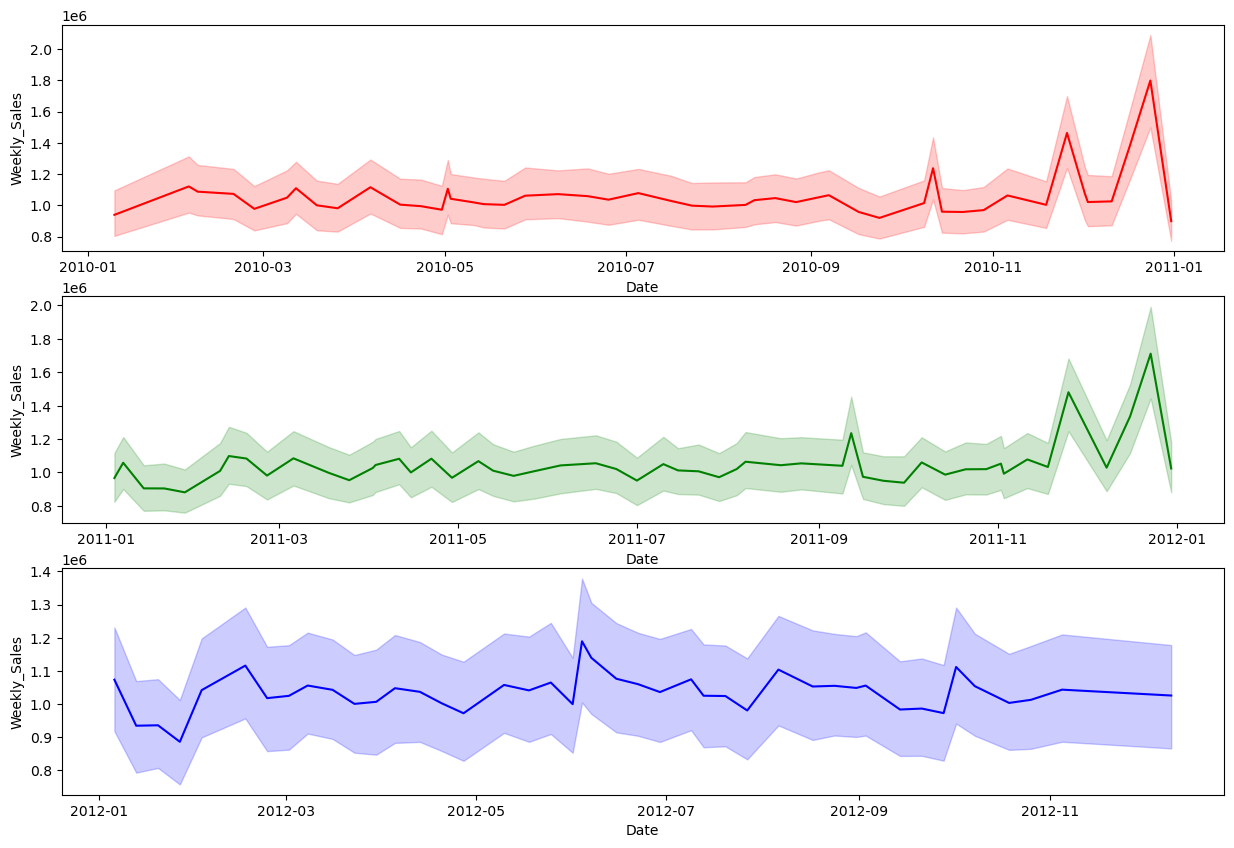

In [52]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
sns.lineplot(x='Date',y='Weekly_Sales', data=year_2010,color='r')

plt.subplot(3,1,2)
sns.lineplot(x='Date', y='Weekly_Sales', data=year_2011, color='g')

plt.subplot(3,1,3)
sns.lineplot(x='Date',y='Weekly_Sales', data=year_2012,color='b')
plt.show();

### Yearly sales from each stores

In [53]:
yearly_sales_store = data.groupby(['Store','year'])['Weekly_Sales'].sum()
yearly_sales_store

Store  year
1      2010    73278832.00
       2011    80921918.83
       2012    68202058.02
2      2010    95277864.19
       2011    98607881.42
                  ...     
44     2011    15498194.67
       2012    14187373.72
45     2010    38536343.37
       2011    41135367.88
       2012    32723630.17
Name: Weekly_Sales, Length: 135, dtype: float64

In [54]:
yearly_sales_store = yearly_sales_store.reset_index()
yearly_sales_store.head()

,Store,year,Weekly_Sales
0,1,2010,73278832.00
1,1,2011,80921918.83
2,1,2012,68202058.02
3,2,2010,95277864.19
4,2,2011,98607881.42


In [55]:
yearly_sales_store.nlargest(10,'Weekly_Sales')

,Store,year,Weekly_Sales
10,4,2011,1.110923e+08
58,20,2011,1.098370e+08
40,14,2011,1.060963e+08
39,14,2010,1.054622e+08
37,13,2011,1.045375e+08
57,20,2010,1.017331e+08
28,10,2011,9.891689e+07
4,2,2011,9.860788e+07
9,4,2010,9.568047e+07
3,2,2010,9.527786e+07


### Top stores in each year

In [56]:
yearly_sales_store_2010=yearly_sales_store[yearly_sales_store.year==2010]
yearly_sales_store_2011=yearly_sales_store[yearly_sales_store.year==2011]
yearly_sales_store_2012=yearly_sales_store[yearly_sales_store.year==2012]


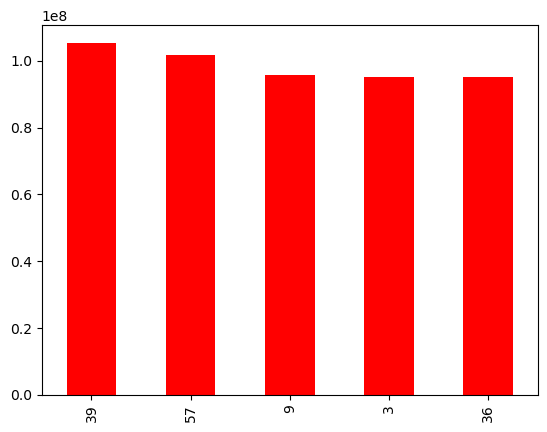

In [57]:
yearly_sales_store_2010.Weekly_Sales.nlargest(5).plot.bar(color = 'r');


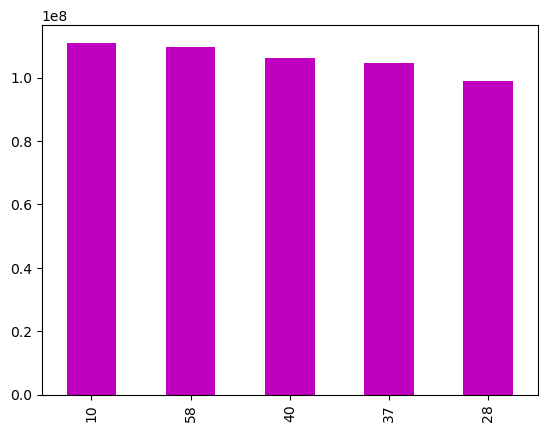

In [58]:
yearly_sales_store_2011.Weekly_Sales.nlargest(5).plot.bar(color = 'm');


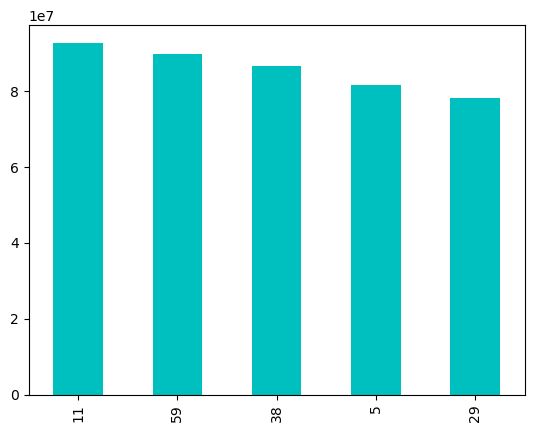

In [59]:
yearly_sales_store_2012.Weekly_Sales.nlargest(5).plot.bar(color = 'c');


#### Temperature conversion(-2F-32)*5/9 

In [60]:
data['Celsius'] = [(Temp-32)*(5/9) for Temp in data.Temperature]
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,week_day,Celsius
0,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,2010,January,Saturday,21.722222
1,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,2010,January,Saturday,15.383333
2,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,2010,January,Saturday,30.005556
3,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,2010,January,Saturday,33.027778
4,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,2010,January,Saturday,23.700000


#### lets create a new column called heat

In [61]:
data['weather'] = pd.cut(x=data.Celsius, bins=[-30,0,15,45], labels=['very_cold','normal','warm'])
data.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,week_day,Celsius,weather
221,11,2010-02-26,1336404.65,0,52.79,2.561,214.647513,7.368,2010,February,Thursday,11.550000,normal
853,41,2010-05-28,1246654.24,0,56.97,2.737,189.445243,7.363,2010,May,Thursday,13.872222,normal
1122,6,2010-07-23,1585240.92,0,83.90,2.608,212.757850,6.973,2010,July,Thursday,28.833333,warm
677,14,2010-05-11,2078417.47,0,45.65,2.917,182.946365,8.724,2010,May,Monday,7.583333,normal
4938,41,2012-03-16,1201511.62,0,47.76,3.486,197.045721,6.589,2012,March,Thursday,8.755556,normal


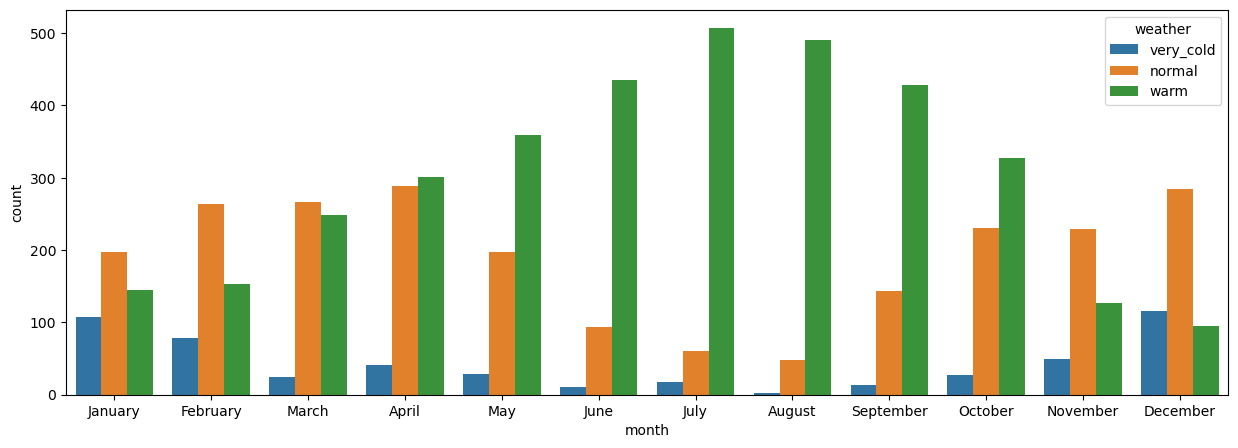

In [62]:
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='month',hue='weather')
plt.show()

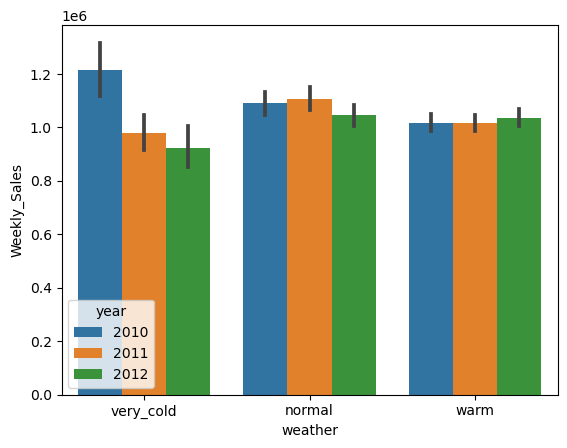

In [63]:
sns.barplot(x='weather',y='Weekly_Sales',hue='year',data=data);

# Heat map

<Axes: >

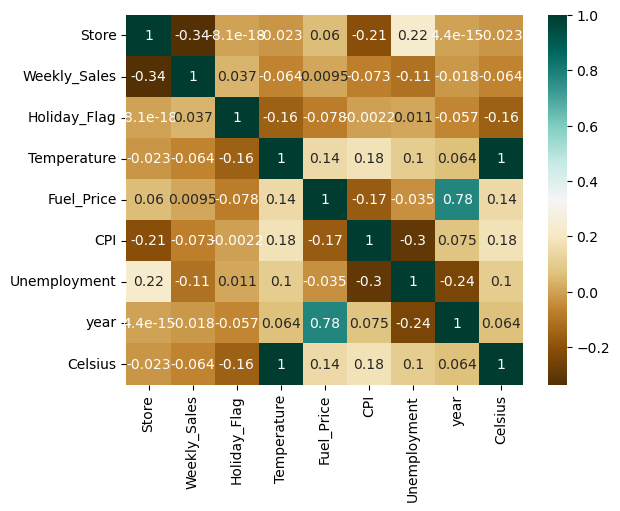

In [64]:
sns.heatmap(data.corr(),annot=True, cmap='BrBG')

<Axes: >

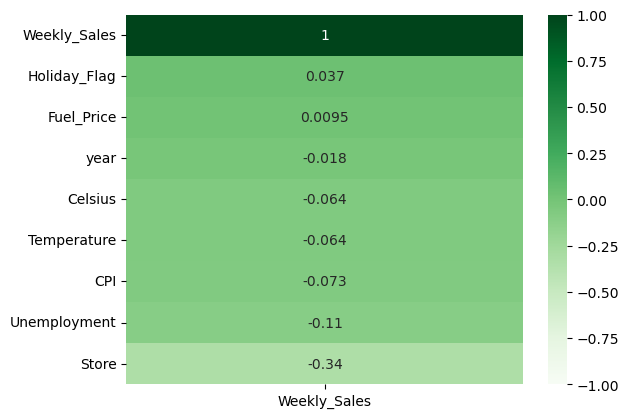

In [65]:
sns.heatmap(data.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False),annot=True, cmap='Greens',vmin=-1,vmax=1)

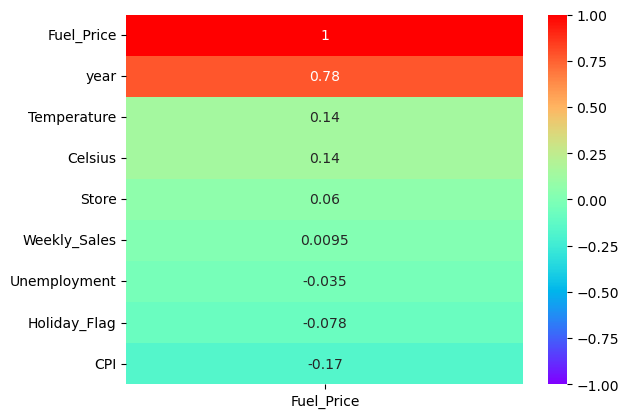

In [66]:
month_sales= data.groupby(['month'])['Weekly_Sales']

sns.heatmap(data.corr()[['Fuel_Price']].sort_values(by='Fuel_Price', ascending=False),annot=True, cmap='rainbow',vmin=-1,vmax=1);

## Plotting from pivot  tables

In [67]:
monthly_sales= pd.pivot_table(data=data, values='Weekly_Sales', index='month',columns='year')
monthly_sales

year,2010,2011,2012
month,,,
April,1.021177e+06,1.033220e+06,1.014127e+06
August,1.025212e+06,1.044895e+06,1.064514e+06
December,1.198413e+06,1.274311e+06,1.025078e+06
February,1.064372e+06,1.042273e+06,1.057997e+06
January,9.386639e+05,9.420697e+05,9.567817e+05
July,1.023702e+06,9.976049e+05,1.025480e+06
June,1.055082e+06,1.038471e+06,1.082920e+06
March,1.034590e+06,1.011263e+06,1.025510e+06
May,1.039303e+06,1.015565e+06,1.053948e+06


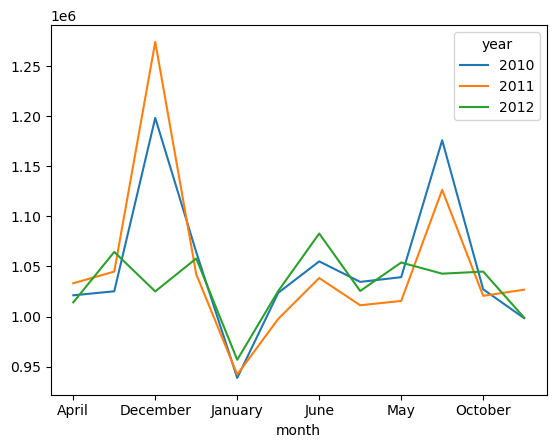

In [68]:
monthly_sales.plot();

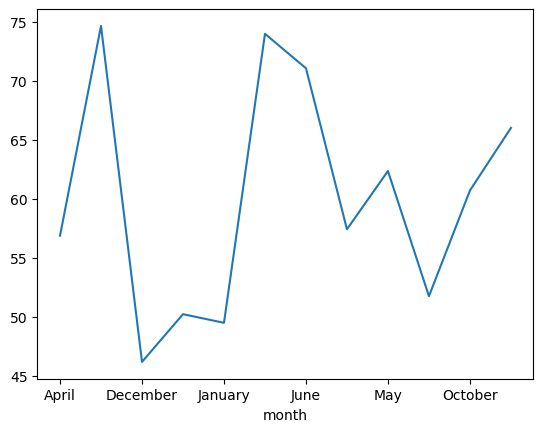

In [69]:
month_temp.plot();

In [70]:
weather_celsius= data.groupby(['weather'])['Celsius'].mean()
weather_celsius

weather
very_cold    -3.913581
normal        8.483020
warm         23.486901
Name: Celsius, dtype: float64

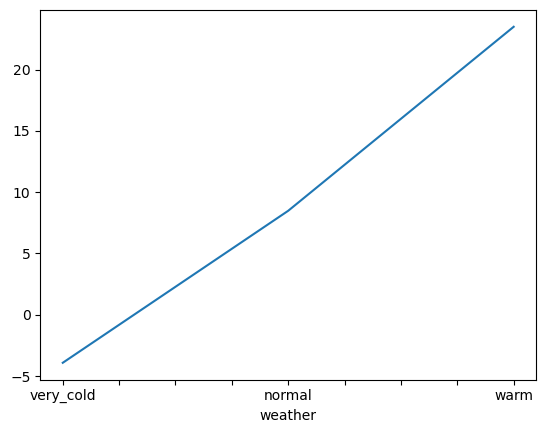

In [71]:
weather_celsius.plot();

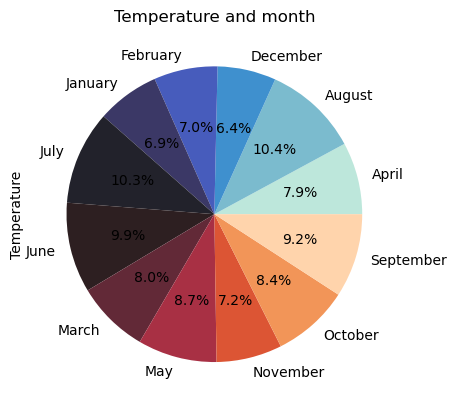

In [72]:
month_temp.plot.pie(autopct = '%1.1f%%',cmap='icefire')
plt.title("Temperature and month")
plt.show();

In [73]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'week_day',
       'Celsius', 'weather'],
      dtype='object')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   year          6435 non-null   int64         
 9   month         6435 non-null   object        
 10  week_day      6435 non-null   object        
 11  Celsius       6435 non-null   float64       
 12  weather       6435 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 609.8+ KB
